In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import List
import numpy as np
import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from gaussian_model import LinearKernel, ConstantKernel
from gaussian_model import ExponentialKernel, PeriodicKernel
from gaussian_model import WhiteNoiseKernel, GaussKernel
from gaussian_model import LogGaussKernel
from gaussian_model import Gaussian_Process_Regression

from sklearn.gaussian_process import kernels
from sklearn.gaussian_process import GaussianProcessRegressor

%matplotlib inline
%matplotlib ipympl

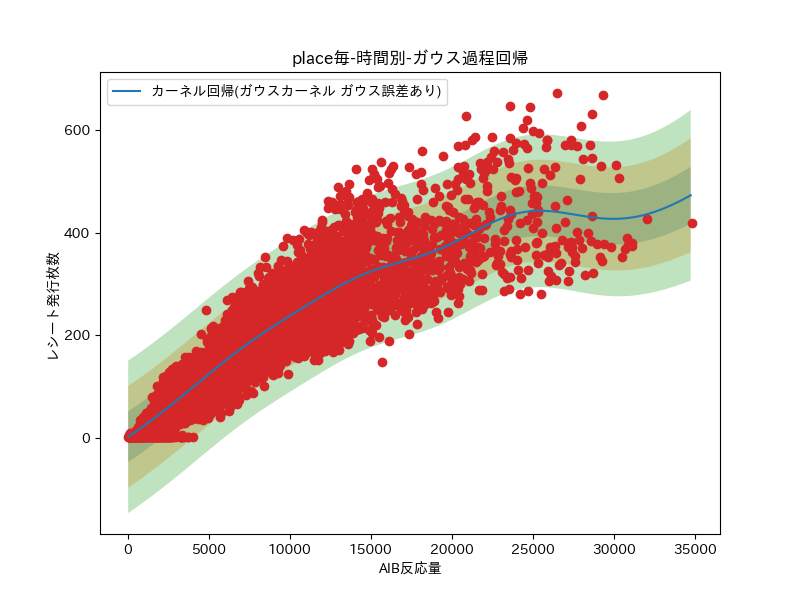

In [5]:
pdf_olympic = pd.read_csv('test_data/ガウス過程回帰_TRAIN_DATA(place毎-時間別-ALLBeacon).csv', header=0, index_col=False)
pdf_olympic = pdf_olympic.drop_duplicates(subset=['aib_count', 'レシート枚数'])
train_data  = [[row['aib_count'], row['レシート枚数']] for _, row in pdf_olympic.iterrows()]
train_data  = np.array(train_data)

x_data = np.array(train_data)[:, 0].reshape(-1, 1)
y_data = np.array(train_data)[:, 1].reshape(-1, 1)


kernel = LinearKernel(alpha=1)          \
         + GaussKernel(alpha=1, beta=1) \
         + WhiteNoiseKernel(alpha=1)
model  = Gaussian_Process_Regression(
    		x_data, 
            y_data,
            kernel=kernel, 
            norm_α=10, 
            l1_ratio=0.1, 
            eta=1e-8, 
            tol=1e-6, 
            max_iterate=15000)

# thetas = (np.float64(0.2198555583884304),
# 			np.float64(0.6416631200503681),
# 			np.float64(0.786756468864674),
# 			np.float64(0.15473983408951392))
thetas = (np.float64(0.2535185293016272),
 np.float64(0.07541797904614779),
 np.float64(0.6492580695680243),
 np.float64(0.1806761759586281))
model.kernel.set_theta(thetas)

# メモ：
# あまりにも時間がかかりすぎるため、学習プロセスと予測プロセスを分けて実行することとした
# solver = "external library"
# solver = "ISTA"
solver = "OPTIMIZER"
model.fit(solver=solver, useRAdam=False, dryRun=True)

x_test    = np.arange(x_data.min(), x_data.max(), 100)
pred_mean, pred_std = model.predict(x_test.reshape((-1, 1)), return_std=True)
pred_mean = pred_mean.reshape(-1)

# データを描画
plt.figure(figsize=(8, 6))
plt.plot(x_test, pred_mean, label='カーネル回帰(ガウスカーネル ガウス誤差あり)')
plt.fill_between(x_test, pred_mean -   pred_std, pred_mean +   pred_std, alpha=0.3)
plt.fill_between(x_test, pred_mean - 2*pred_std, pred_mean + 2*pred_std, alpha=0.3)
plt.fill_between(x_test, pred_mean - 3*pred_std, pred_mean + 3*pred_std, alpha=0.3)
plt.scatter(x_data, y_data, marker='o')
plt.title('place毎-時間別-ガウス過程回帰')
plt.xlabel('AIB反応量')
plt.ylabel('レシート発行枚数')
plt.legend()
plt.show()

In [4]:
model.kernel.get_theta()

(np.float64(0.2535185293016272),
 np.float64(0.07541797904614779),
 np.float64(0.6492580695680243),
 np.float64(0.1806761759586281))